# CA5 Phase2

### The purpose of this project is to create a Neural Network with TensorFlow and Keras library and Train it with given dataset and then test it with given test dataset

# Imports

In [2]:
import os
import random
import tensorboard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from sklearn.metrics import classification_report

# Body

# Part 1: Data Analysis and Preprocess¶

In [3]:
train_path = "../dataset/train"

In [4]:
img_path = []
labels = []
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    for img in os.listdir(folder_path):
        img_path.append(os.path.join(folder_path, img))
        labels.append(folder)

In [5]:
df = pd.DataFrame({
    "image" : img_path,
    "label" : labels
})

In [6]:
df.count()

image    1953
label    1953
dtype: int64

In [7]:
df['label'].value_counts().count()

4

In [8]:
df['label'].value_counts()

bald_eagle    523
racoon        509
elk           462
raven         459
Name: label, dtype: int64

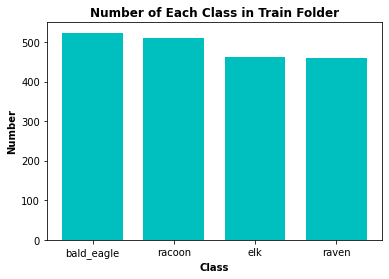

In [9]:
plt.bar(
    df['label'].value_counts().keys(),
    df['label'].value_counts().values,
    color='c',
    width=.75
)
plt.xlabel("Class", fontweight ='bold')
plt.ylabel("Number", fontweight ='bold')
plt.title("Number of Each Class in Train Folder", fontweight ='bold')
plt.show()

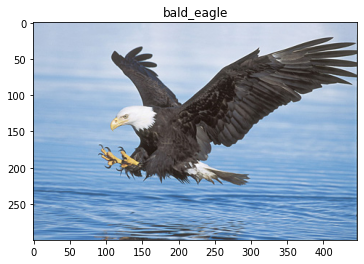

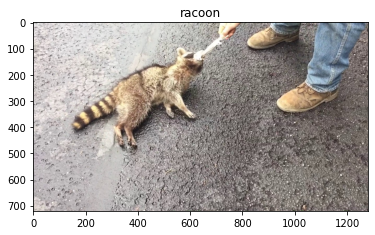

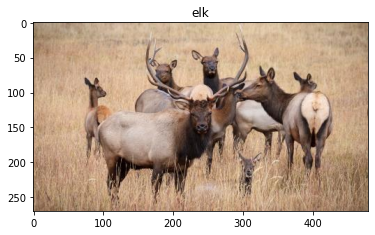

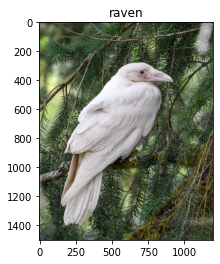

In [10]:
for name in df['label'].value_counts().keys():
    rand_num = random.randint(0, len(df))
    while df['label'][rand_num] != name:
        rand_num = random.randint(0, len(df))
    img = load_img(df['image'][rand_num])
    title = df['label'][rand_num]
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [11]:
classes_labels = {
    df['label'].value_counts().keys()[i] : i for i in range(0, df['label'].value_counts().count())
}

In [12]:
classes_labels

{'bald_eagle': 0, 'racoon': 1, 'elk': 2, 'raven': 3}

In [13]:
df['label']

0       bald_eagle
1       bald_eagle
2       bald_eagle
3       bald_eagle
4       bald_eagle
           ...    
1948        racoon
1949        racoon
1950        racoon
1951        racoon
1952        racoon
Name: label, Length: 1953, dtype: object

In [14]:
for i in range(len(df)):
    df['label'][i] = classes_labels[df['label'][i]]

In [15]:
df['label']

0       0
1       0
2       0
3       0
4       0
       ..
1948    1
1949    1
1950    1
1951    1
1952    1
Name: label, Length: 1953, dtype: object

In [16]:
one_hot = [str(to_categorical(i, df['label'].value_counts().count())) for i in df['label']]

In [17]:
df['label'] = one_hot

In [18]:
df['label']

0       [1. 0. 0. 0.]
1       [1. 0. 0. 0.]
2       [1. 0. 0. 0.]
3       [1. 0. 0. 0.]
4       [1. 0. 0. 0.]
            ...      
1948    [0. 1. 0. 0.]
1949    [0. 1. 0. 0.]
1950    [0. 1. 0. 0.]
1951    [0. 1. 0. 0.]
1952    [0. 1. 0. 0.]
Name: label, Length: 1953, dtype: object

### As seen above, labels are one hot encoded

### We dont have an order or rank in our classes, but, when label encoding is performed, the class names are ranked. Due to this, there is a very high probability that the model captures the relationship between classes based on their ranks. So, we use One Hot Encoding to solve this problem.

In [19]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255.0,
    validation_split = 0.25,
)

### Shuffle dataframe befor dividing to Train and Validation:

In [20]:
df = df.sample(frac = 1)

In [21]:
df

,image,label
1514,../dataset/train/racoon/9c71955d15d3499621.jpg,[0. 1. 0. 0.]
146,../dataset/train/bald_eagle/4c1e35fdac382f5499...,[1. 0. 0. 0.]
1181,../dataset/train/elk/cb8eda7f0ecba79c50.jpg,[0. 0. 1. 0.]
1579,../dataset/train/racoon/2c1c235a1710af36f6.jpg,[0. 1. 0. 0.]
1159,../dataset/train/elk/b111b6fa5e315f78e0.jpg,[0. 0. 1. 0.]
...,...,...
1265,../dataset/train/elk/26912929c98906c863.jpg,[0. 0. 1. 0.]
1223,../dataset/train/elk/0dc8ae158f2858224c.jpg,[0. 0. 1. 0.]
1485,../dataset/train/racoon/afacd9d31032669dbe.jpg,[0. 1. 0. 0.]
1629,../dataset/train/racoon/4bddc043bc5d64cc49.jpg,[0. 1. 0. 0.]


In [22]:
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'label',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = False,
    validate_filenames = False
)   

Found 1465 non-validated image filenames belonging to 4 classes.


In [23]:
ValidationData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'label',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = False,
    validate_filenames = False
)

Found 488 non-validated image filenames belonging to 4 classes.


# Part 2: Make Neural Network

In [52]:
inpt = layers.Input(shape=(128, 128, 1))

output = layers.Flatten()(inpt)
output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)

In [53]:
model = models.Model(inputs = inpt, outputs = output)

In [54]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [55]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_12 (Dense)            (None, 1024)              16778240  
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 17,435,396
Trainable params: 17,435,396
Non-t

### The number of parameters is equal to the product of the number of nodes in two consecutive layers.

# Part 3: Data Classification

In [56]:
history = model.fit(TrainData, validation_data = ValidationData, epochs=15)

Epoch 1/15
 7/46 [===>..........................] - ETA: 13s - loss: 1.8109 - accuracy: 0.1786

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 17s 360ms/step - loss: 1.4026 - accuracy: 0.3297 - val_loss: 1.3163 - val_accuracy: 0.3525
Epoch 2/15
46/46 [==============================] - 16s 349ms/step - loss: 1.2298 - accuracy: 0.4389 - val_loss: 1.2165 - val_accuracy: 0.4467
Epoch 3/15
46/46 [==============================] - 16s 354ms/step - loss: 1.1838 - accuracy: 0.4853 - val_loss: 1.1723 - val_accuracy: 0.4672
Epoch 4/15
46/46 [==============================] - 16s 360ms/step - loss: 1.1122 - accuracy: 0.5331 - val_loss: 1.5429 - val_accuracy: 0.3422
Epoch 5/15
46/46 [==============================] - 17s 362ms/step - loss: 1.1040 - accuracy: 0.5290 - val_loss: 1.0978 - val_accuracy: 0.5164
Epoch 6/15
46/46 [==============================] - 16s 356ms/step - loss: 1.0555 - accuracy: 0.5365 - val_loss: 1.1824 - val_accuracy: 0.4283
Epoch 7/15
46/46 [==============================] - 16s 351ms/step - loss: 1.0326 - accuracy: 0.5666 - val_loss: 1.1051 - val_accuracy: 0.5000
Epoch 8/15

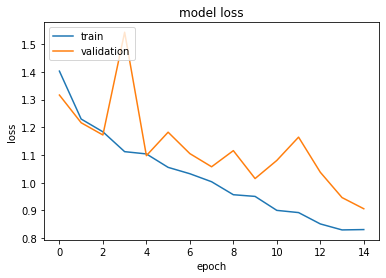

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

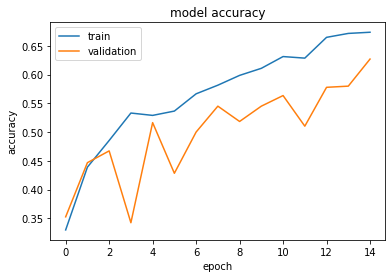

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
y_pred = model.predict(TrainData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

46/46 [==============================] - 12s 260ms/step


In [60]:
y_pred

array([[0.7713665 , 0.02584481, 0.12765549, 0.07513329],
       [0.17550854, 0.34338397, 0.22881329, 0.2522942 ],
       [0.04906982, 0.58201116, 0.22914246, 0.13977665],
       ...,
       [0.34948173, 0.06292203, 0.4330596 , 0.15453662],
       [0.00351831, 0.11650465, 0.86881655, 0.01116046],
       [0.13907391, 0.26893753, 0.46156743, 0.13042109]], dtype=float32)

In [61]:
y_pred_bool

array([0, 1, 1, ..., 2, 2, 2])

In [62]:
y_pred_one_hot = [str(to_categorical(i, 4)) for i in y_pred_bool]

In [63]:
y_pred_one_hot

['[1. 0. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 1. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 1. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 0. 1.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 0. 1.]',
 '[1. 0. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 1. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[1. 0. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 1. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 0. 1.]',
 '[1. 0. 0. 0.]',
 '[0. 1. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[1. 0. 0. 0.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 0. 1.]',
 '[0. 0. 1. 0.]',
 '[0. 0. 0

In [64]:
print(classification_report(df['label'][0:len(y_pred_bool)], y_pred_one_hot))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.17      0.20       352
[0. 0. 1. 0.]       0.24      0.24      0.24       355
[0. 1. 0. 0.]       0.26      0.26      0.26       378
[1. 0. 0. 0.]       0.28      0.35      0.31       380

     accuracy                           0.26      1465
    macro avg       0.25      0.25      0.25      1465
 weighted avg       0.25      0.26      0.25      1465



In [80]:
validation_y_pred = model.predict(ValidationDatadationData, verbose = 1)
validation_y_pred_bool = np.argmax(validation_y_pred, axis = 1)
validation_y_pred_one_hot = [str(to_categorical(i, 4)) for i in validation_y_pred_bool]

 3/16 [====>.........................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 235ms/step


In [81]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.36      0.28       107
[0. 0. 1. 0.]       0.21      0.22      0.22       107
[0. 1. 0. 0.]       0.24      0.34      0.28       131
[1. 0. 0. 0.]       0.38      0.07      0.12       143

     accuracy                           0.24       488
    macro avg       0.27      0.25      0.22       488
 weighted avg       0.27      0.24      0.22       488



## Section 1: Optimizer Effect

### Momentum is an extension to the gradient descent optimization algorithm, often referred to as gradient descent with momentum.

### It is designed to accelerate the optimization process, e.g. decrease the number of function evaluations required to reach the optima, or to improve the capability of the optimization algorithm, e.g. result in a better final result.

### Momentum involves adding an additional hyperparameter that controls the amount of history (momentum) to include in the update equation, i.e. the step to a new point in the search space. The value for the hyperparameter is defined in the range 0.0 to 1.0 and often has a value close to 1.0, such as 0.8, 0.9, or 0.99. A momentum of 0.0 is the same as gradient descent without momentum.

### Momentum is most useful in optimization problems where the objective function has a large amount of curvature (e.g. changes a lot), meaning that the gradient may change a lot over relatively small regions of the search space.

### It is also helpful when the gradient is estimated, such as from a simulation, and may be noisy, e.g. when the gradient has a high variance.

### Finally, momentum is helpful when the search space is flat or nearly flat, e.g. zero gradient. The momentum allows the search to progress in the same direction as before the flat spot and helpfully cross the flat region.
refrence : https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/

## Model With Momentum = 0.5

In [65]:
model_2 = models.Model(inputs = inpt, outputs = output)

In [66]:
model_2.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.5), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [68]:
history_2 = model_2.fit(TrainData, validation_data = ValidationData, epochs=15)

Epoch 1/15
22/46 [=============>................] - ETA: 7s - loss: 0.9360 - accuracy: 0.6141

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 18s 395ms/step - loss: 0.9250 - accuracy: 0.6171 - val_loss: 0.9419 - val_accuracy: 0.6516
Epoch 2/15
46/46 [==============================] - 18s 385ms/step - loss: 0.8456 - accuracy: 0.6614 - val_loss: 1.0837 - val_accuracy: 0.5451
Epoch 3/15
46/46 [==============================] - 17s 377ms/step - loss: 0.7750 - accuracy: 0.6826 - val_loss: 1.2407 - val_accuracy: 0.4980
Epoch 4/15
46/46 [==============================] - 17s 366ms/step - loss: 0.7567 - accuracy: 0.7085 - val_loss: 0.8472 - val_accuracy: 0.6680
Epoch 5/15
46/46 [==============================] - 17s 367ms/step - loss: 0.7678 - accuracy: 0.7017 - val_loss: 0.8641 - val_accuracy: 0.6639
Epoch 6/15
46/46 [==============================] - 17s 361ms/step - loss: 0.6708 - accuracy: 0.7433 - val_loss: 1.1770 - val_accuracy: 0.5471
Epoch 7/15
46/46 [==============================] - 16s 353ms/step - loss: 0.6794 - accuracy: 0.7379 - val_loss: 0.8857 - val_accuracy: 0.6680
Epoch 8/15

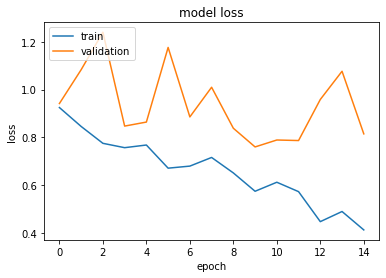

In [69]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

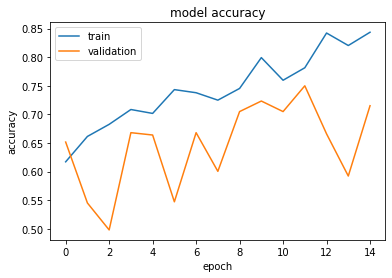

In [70]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [71]:
y_pred_2 = model_2.predict(TrainData, verbose = 1)
y_pred_bool_2 = np.argmax(y_pred_2, axis = 1)
y_pred_one_hot_2 = [str(to_categorical(i, 4)) for i in y_pred_bool_2]

46/46 [==============================] - 12s 271ms/step


In [72]:
print(classification_report(df['label'][0:len(y_pred_bool_2)], y_pred_one_hot_2))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.24      0.23       352
[0. 0. 1. 0.]       0.25      0.26      0.26       355
[0. 1. 0. 0.]       0.27      0.28      0.28       378
[1. 0. 0. 0.]       0.28      0.24      0.26       380

     accuracy                           0.26      1465
    macro avg       0.26      0.26      0.26      1465
 weighted avg       0.26      0.26      0.26      1465



In [82]:
validation_y_pred_2 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_2 = np.argmax(validation_y_pred_2, axis = 1)
validation_y_pred_one_hot_2 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_2]

 3/16 [====>.........................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 262ms/step


In [83]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_2))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.36      0.28       107
[0. 0. 1. 0.]       0.21      0.22      0.22       107
[0. 1. 0. 0.]       0.24      0.34      0.28       131
[1. 0. 0. 0.]       0.38      0.07      0.12       143

     accuracy                           0.24       488
    macro avg       0.27      0.25      0.22       488
 weighted avg       0.27      0.24      0.22       488



## Model With Momentum = 0.9

In [73]:
model_3 = models.Model(inputs = inpt, outputs = output)

In [74]:
model_3.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [75]:
history_3 = model_3.fit(TrainData, validation_data = ValidationData, epochs=15)

Epoch 1/15
36/46 [======================>.......] - ETA: 2s - loss: 1.3417 - accuracy: 0.4952

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 17s 375ms/step - loss: 1.2949 - accuracy: 0.4976 - val_loss: 1.2350 - val_accuracy: 0.4590
Epoch 2/15
46/46 [==============================] - 16s 356ms/step - loss: 1.0721 - accuracy: 0.5181 - val_loss: 1.0295 - val_accuracy: 0.6148
Epoch 3/15
46/46 [==============================] - 16s 359ms/step - loss: 0.9712 - accuracy: 0.5884 - val_loss: 1.1869 - val_accuracy: 0.4713
Epoch 4/15
46/46 [==============================] - 17s 365ms/step - loss: 0.9625 - accuracy: 0.5706 - val_loss: 1.1697 - val_accuracy: 0.4447
Epoch 5/15
46/46 [==============================] - 17s 361ms/step - loss: 0.9692 - accuracy: 0.5959 - val_loss: 1.0190 - val_accuracy: 0.5779
Epoch 6/15
46/46 [==============================] - 17s 372ms/step - loss: 1.0032 - accuracy: 0.5754 - val_loss: 1.0346 - val_accuracy: 0.5635
Epoch 7/15
46/46 [==============================] - 16s 362ms/step - loss: 0.8180 - accuracy: 0.6717 - val_loss: 1.0193 - val_accuracy: 0.5820
Epoch 8/15

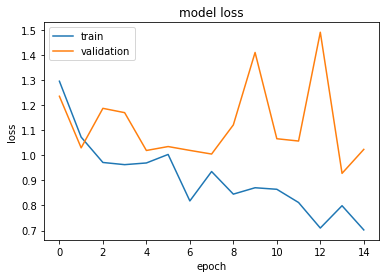

In [76]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

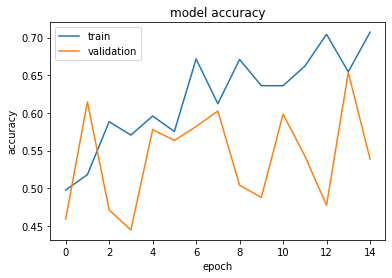

In [77]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [78]:
y_pred_3 = model_3.predict(TrainData, verbose = 1)
y_pred_bool_3 = np.argmax(y_pred_3, axis = 1)
y_pred_one_hot_3 = [str(to_categorical(i, 4)) for i in y_pred_bool_3]

46/46 [==============================] - 12s 261ms/step


In [79]:
print(classification_report(df['label'][0:len(y_pred_bool_3)], y_pred_one_hot_3))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.25      0.36      0.30       352
[0. 0. 1. 0.]       0.26      0.28      0.27       355
[0. 1. 0. 0.]       0.26      0.33      0.29       378
[1. 0. 0. 0.]       0.30      0.07      0.12       380

     accuracy                           0.26      1465
    macro avg       0.27      0.26      0.24      1465
 weighted avg       0.27      0.26      0.24      1465



In [84]:
validation_y_pred_3 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_3 = np.argmax(validation_y_pred_3, axis = 1)
validation_y_pred_one_hot_3 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_3]

 3/16 [====>.........................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 235ms/step


In [85]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_3))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.36      0.28       107
[0. 0. 1. 0.]       0.21      0.22      0.22       107
[0. 1. 0. 0.]       0.24      0.34      0.28       131
[1. 0. 0. 0.]       0.38      0.07      0.12       143

     accuracy                           0.24       488
    macro avg       0.27      0.25      0.22       488
 weighted avg       0.27      0.24      0.22       488



### NO, a large momentum (e.g. 0.9) will mean that the update is strongly influenced by the previous update, whereas a modest momentum (0.2) will mean very little influence. So increase the momentum does not always improve the result.

## Model with Adam

In [105]:
model_4 = models.Model(inputs = inpt, outputs = output)

In [106]:
model_4.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [107]:
history_4 = model_4.fit(TrainData, validation_data = ValidationData, epochs=10)

Epoch 1/10
11/46 [======>.......................] - ETA: 10s - loss: 1.1146 - accuracy: 0.6875

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 17s 377ms/step - loss: 0.6553 - accuracy: 0.7666 - val_loss: 1.2389 - val_accuracy: 0.6209
Epoch 2/10
46/46 [==============================] - 17s 362ms/step - loss: 0.3772 - accuracy: 0.8464 - val_loss: 1.5262 - val_accuracy: 0.6066
Epoch 3/10
46/46 [==============================] - 16s 362ms/step - loss: 0.3495 - accuracy: 0.8614 - val_loss: 1.3733 - val_accuracy: 0.6762
Epoch 4/10
46/46 [==============================] - 17s 362ms/step - loss: 0.4599 - accuracy: 0.8212 - val_loss: 1.2639 - val_accuracy: 0.6332
Epoch 5/10
46/46 [==============================] - 16s 361ms/step - loss: 0.4422 - accuracy: 0.8307 - val_loss: 1.0527 - val_accuracy: 0.6926
Epoch 6/10
46/46 [==============================] - 17s 361ms/step - loss: 0.4769 - accuracy: 0.8041 - val_loss: 0.9774 - val_accuracy: 0.6865
Epoch 7/10
46/46 [==============================] - 16s 359ms/step - loss: 0.3114 - accuracy: 0.8785 - val_loss: 1.2716 - val_accuracy: 0.6455
Epoch 8/10

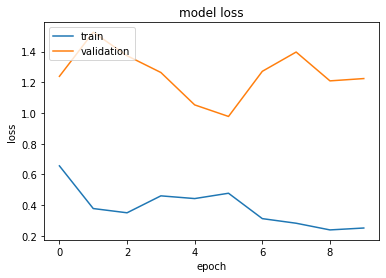

In [108]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

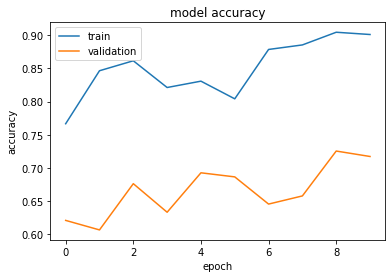

In [109]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [110]:
y_pred_4 = model_4.predict(TrainData, verbose = 1)
y_pred_bool_4 = np.argmax(y_pred_4, axis = 1)
y_pred_one_hot_4 = [str(to_categorical(i, 4)) for i in y_pred_bool_4]

46/46 [==============================] - 12s 265ms/step


In [111]:
print(classification_report(df['label'][0:len(y_pred_bool_4)], y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.27      0.24       352
[0. 0. 1. 0.]       0.25      0.26      0.26       355
[0. 1. 0. 0.]       0.26      0.25      0.25       378
[1. 0. 0. 0.]       0.27      0.22      0.24       380

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.25      1465
 weighted avg       0.25      0.25      0.25      1465



In [112]:
validation_y_pred_4 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_4 = np.argmax(validation_y_pred_4, axis = 1)
validation_y_pred_one_hot_4 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_4]

 3/16 [====>.........................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 239ms/step


In [113]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.20      0.22      0.21       107
[0. 0. 1. 0.]       0.20      0.21      0.21       107
[0. 1. 0. 0.]       0.20      0.22      0.21       131
[1. 0. 0. 0.]       0.31      0.23      0.26       143

     accuracy                           0.22       488
    macro avg       0.23      0.22      0.22       488
 weighted avg       0.23      0.22      0.23       488



### Compare Adam and SGD:

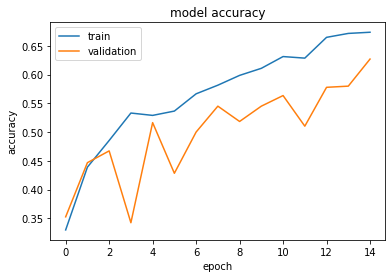

In [114]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

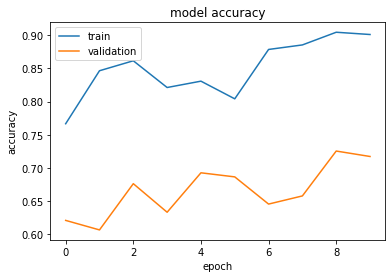

In [115]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [116]:
print(classification_report(df['label'][0:len(y_pred_bool)], y_pred_one_hot))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.17      0.20       352
[0. 0. 1. 0.]       0.24      0.24      0.24       355
[0. 1. 0. 0.]       0.26      0.26      0.26       378
[1. 0. 0. 0.]       0.28      0.35      0.31       380

     accuracy                           0.26      1465
    macro avg       0.25      0.25      0.25      1465
 weighted avg       0.25      0.26      0.25      1465



In [117]:
print(classification_report(df['label'][0:len(y_pred_bool_4)], y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.27      0.24       352
[0. 0. 1. 0.]       0.25      0.26      0.26       355
[0. 1. 0. 0.]       0.26      0.25      0.25       378
[1. 0. 0. 0.]       0.27      0.22      0.24       380

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.25      1465
 weighted avg       0.25      0.25      0.25      1465



In [118]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.36      0.28       107
[0. 0. 1. 0.]       0.21      0.22      0.22       107
[0. 1. 0. 0.]       0.24      0.34      0.28       131
[1. 0. 0. 0.]       0.38      0.07      0.12       143

     accuracy                           0.24       488
    macro avg       0.27      0.25      0.22       488
 weighted avg       0.27      0.24      0.22       488



In [119]:
print(classification_report(df['label'][len(y_pred_bool_4):], validation_y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.20      0.22      0.21       107
[0. 0. 1. 0.]       0.20      0.21      0.21       107
[0. 1. 0. 0.]       0.20      0.22      0.21       131
[1. 0. 0. 0.]       0.31      0.23      0.26       143

     accuracy                           0.22       488
    macro avg       0.23      0.22      0.22       488
 weighted avg       0.23      0.22      0.23       488



### Adam learn faster so 10 epoch is enough and has better accuracy and better result than SGD. (Especially on Train Data)

## Section 2: Epoch Effect

In [132]:
model_5 = models.Model(inputs = inpt, outputs = output)

In [133]:
model_5.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [134]:
history_5 = model_5.fit(TrainData, validation_data = ValidationData, epochs=20)

Epoch 1/20
46/46 [==============================] - 18s 394ms/step - loss: 0.6026 - accuracy: 0.8532 - val_loss: 1.3235 - val_accuracy: 0.7275
Epoch 2/20
46/46 [==============================] - 17s 363ms/step - loss: 0.1477 - accuracy: 0.9468 - val_loss: 1.3774 - val_accuracy: 0.6926
Epoch 3/20
46/46 [==============================] - 17s 369ms/step - loss: 0.1640 - accuracy: 0.9461 - val_loss: 1.3767 - val_accuracy: 0.7418
Epoch 4/20
46/46 [==============================] - 18s 387ms/step - loss: 0.1689 - accuracy: 0.9420 - val_loss: 1.4065 - val_accuracy: 0.7295
Epoch 5/20
46/46 [==============================] - 17s 380ms/step - loss: 0.1237 - accuracy: 0.9543 - val_loss: 1.6951 - val_accuracy: 0.7357
Epoch 6/20
46/46 [==============================] - 17s 373ms/step - loss: 0.1993 - accuracy: 0.9392 - val_loss: 2.5842 - val_accuracy: 0.5738
Epoch 7/20
46/46 [==============================] - 17s 377ms/step - loss: 0.4753 - accuracy: 0.8471 - val_loss: 1.1974 - val_accuracy: 0.7316

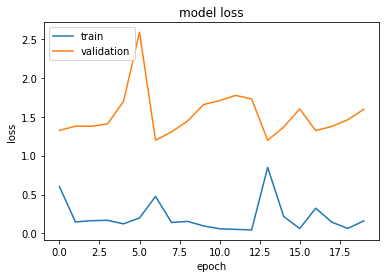

In [135]:
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

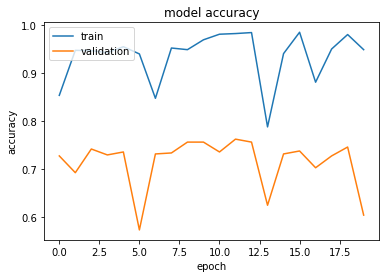

In [136]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [137]:
y_pred_5 = model_5.predict(TrainData, verbose = 1)
y_pred_bool_5 = np.argmax(y_pred_5, axis = 1)
y_pred_one_hot_5 = [str(to_categorical(i, 4)) for i in y_pred_bool_5]

46/46 [==============================] - 12s 256ms/step


In [138]:
print(classification_report(df['label'][0:len(y_pred_bool_5)], y_pred_one_hot_5))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.40      0.29       352
[0. 0. 1. 0.]       0.25      0.27      0.26       355
[0. 1. 0. 0.]       0.26      0.16      0.20       378
[1. 0. 0. 0.]       0.27      0.17      0.21       380

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.24      1465
 weighted avg       0.25      0.25      0.24      1465



In [139]:
validation_y_pred_5 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_5 = np.argmax(validation_y_pred_5, axis = 1)
validation_y_pred_one_hot_5 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_5]

 3/16 [====>.........................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 253ms/step


In [140]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_5))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.50      0.32       107
[0. 0. 1. 0.]       0.21      0.26      0.23       107
[0. 1. 0. 0.]       0.25      0.11      0.16       131
[1. 0. 0. 0.]       0.32      0.15      0.21       143

     accuracy                           0.24       488
    macro avg       0.25      0.26      0.23       488
 weighted avg       0.26      0.24      0.22       488



### 1: Because one epoch is not enough for learn all weights with proper values because they set randomly at the first time and we need visit Train data more than one time to learn enough.
### If Train Data is big enough, one epoch may be enough.

### 2 : Overfitting

In [141]:
model_6 = models.Model(inputs = inpt, outputs = output)

In [142]:
model_6.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [143]:
history_6 = model_6.fit(TrainData, validation_data = ValidationData, epochs=50)

Epoch 1/50
14/46 [========>.....................] - ETA: 7s - loss: 0.9149 - accuracy: 0.7857

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 17s 361ms/step - loss: 0.4147 - accuracy: 0.8901 - val_loss: 1.2129 - val_accuracy: 0.7500
Epoch 2/50
46/46 [==============================] - 16s 359ms/step - loss: 0.0435 - accuracy: 0.9891 - val_loss: 2.0003 - val_accuracy: 0.7623
Epoch 3/50
46/46 [==============================] - 16s 357ms/step - loss: 0.0710 - accuracy: 0.9741 - val_loss: 2.0998 - val_accuracy: 0.7480
Epoch 4/50
46/46 [==============================] - 16s 348ms/step - loss: 0.2168 - accuracy: 0.9304 - val_loss: 1.3479 - val_accuracy: 0.7439
Epoch 5/50
46/46 [==============================] - 17s 367ms/step - loss: 0.1638 - accuracy: 0.9515 - val_loss: 2.6139 - val_accuracy: 0.6270
Epoch 6/50
46/46 [==============================] - 17s 371ms/step - loss: 0.2448 - accuracy: 0.9174 - val_loss: 1.4804 - val_accuracy: 0.7418
Epoch 7/50
46/46 [==============================] - 17s 369ms/step - loss: 0.2914 - accuracy: 0.8928 - val_loss: 1.8283 - val_accuracy: 0.6455
Epoch 8/50

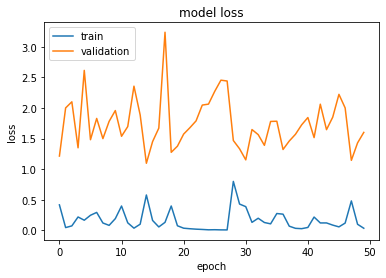

In [144]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

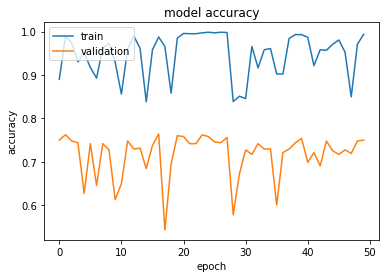

In [145]:
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [146]:
y_pred_6 = model_6.predict(TrainData, verbose = 1)
y_pred_bool_6 = np.argmax(y_pred_6, axis = 1)
y_pred_one_hot_6 = [str(to_categorical(i, 4)) for i in y_pred_bool_6]

46/46 [==============================] - 12s 255ms/step


In [147]:
print(classification_report(df['label'][0:len(y_pred_bool_6)], y_pred_one_hot_6))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.25      0.24       352
[0. 0. 1. 0.]       0.24      0.26      0.25       355
[0. 1. 0. 0.]       0.27      0.24      0.25       378
[1. 0. 0. 0.]       0.26      0.24      0.25       380

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.25      1465
 weighted avg       0.25      0.25      0.25      1465



In [148]:
validation_y_pred_6 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_6 = np.argmax(validation_y_pred_6, axis = 1)
validation_y_pred_one_hot_6 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_6]

 3/16 [====>.........................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 237ms/step


In [149]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_6))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.31      0.26       107
[0. 0. 1. 0.]       0.22      0.21      0.22       107
[0. 1. 0. 0.]       0.23      0.20      0.21       131
[1. 0. 0. 0.]       0.28      0.26      0.27       143

     accuracy                           0.24       488
    macro avg       0.24      0.25      0.24       488
 weighted avg       0.25      0.24      0.24       488



### when model overfitted, then accuracy on validation data will be decreased.

### 3: Early Stopping in Keras

In [150]:
es = callbacks.EarlyStopping(monitor='accuracy', mode = 'max', verbose = 1)

In [153]:
model_7 = models.Model(inputs = inpt, outputs = output)

In [154]:
model_7.compile(optimizer = optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [155]:
history_7 = model_7.fit(TrainData, validation_data = ValidationData, epochs=100, callbacks = [es])

Epoch 1/100
46/46 [==============================] - 17s 374ms/step - loss: 0.5052 - accuracy: 0.8990 - val_loss: 1.4034 - val_accuracy: 0.7275
Epoch 2/100
46/46 [==============================] - 17s 364ms/step - loss: 0.0218 - accuracy: 0.9952 - val_loss: 1.6919 - val_accuracy: 0.7357
Epoch 00002: early stopping


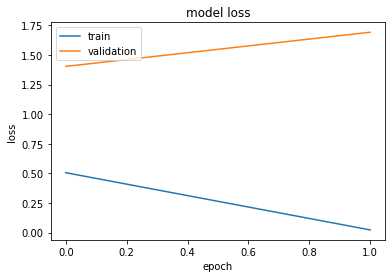

In [156]:
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

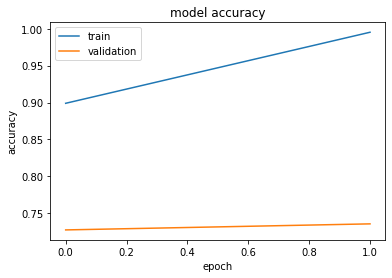

In [157]:
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [158]:
y_pred_7 = model_7.predict(TrainData, verbose = 1)
y_pred_bool_7 = np.argmax(y_pred_7, axis = 1)
y_pred_one_hot_7 = [str(to_categorical(i, 4)) for i in y_pred_bool_7]

46/46 [==============================] - 12s 260ms/step


In [159]:
print(classification_report(df['label'][0:len(y_pred_bool_7)], y_pred_one_hot_7))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.23      0.26      0.24       352
[0. 0. 1. 0.]       0.24      0.26      0.25       355
[0. 1. 0. 0.]       0.27      0.24      0.25       378
[1. 0. 0. 0.]       0.26      0.24      0.25       380

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.25      1465
 weighted avg       0.25      0.25      0.25      1465



In [160]:
validation_y_pred_7 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_7 = np.argmax(validation_y_pred_7, axis = 1)
validation_y_pred_one_hot_7 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_7]

 3/16 [====>.........................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 257ms/step


In [161]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_7))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.36      0.27       107
[0. 0. 1. 0.]       0.22      0.21      0.21       107
[0. 1. 0. 0.]       0.23      0.20      0.21       131
[1. 0. 0. 0.]       0.31      0.23      0.27       143

     accuracy                           0.24       488
    macro avg       0.25      0.25      0.24       488
 weighted avg       0.25      0.24      0.24       488



### 4: NO, It cause overfitting.
### We can solve that with:  1.Reduce overfitting by training the network on more examples.  2. Reduce overfitting by changing the complexity of the network.


## Section 3: Loss Function Effect

In [164]:
model_8 = models.Model(inputs = inpt, outputs = output)

In [165]:
model_8.compile(optimizer = optimizers.Adam(), loss = "mean_squared_error", metrics = ["accuracy"]) 

In [166]:
history_8 = model_8.fit(TrainData, validation_data = ValidationData, epochs=10)

Epoch 1/10
 9/46 [====>.........................] - ETA: 10s - loss: 0.0567 - accuracy: 0.8612

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 17s 366ms/step - loss: 0.0332 - accuracy: 0.9140 - val_loss: 0.1066 - val_accuracy: 0.7459
Epoch 2/10
46/46 [==============================] - 17s 365ms/step - loss: 0.0073 - accuracy: 0.9829 - val_loss: 0.1200 - val_accuracy: 0.7070
Epoch 3/10
46/46 [==============================] - 17s 365ms/step - loss: 0.0620 - accuracy: 0.8485 - val_loss: 0.1151 - val_accuracy: 0.7049
Epoch 4/10
46/46 [==============================] - 17s 366ms/step - loss: 0.0190 - accuracy: 0.9509 - val_loss: 0.1032 - val_accuracy: 0.7459
Epoch 5/10
46/46 [==============================] - 17s 361ms/step - loss: 0.0171 - accuracy: 0.9570 - val_loss: 0.1069 - val_accuracy: 0.7316
Epoch 6/10
46/46 [==============================] - 16s 358ms/step - loss: 0.0029 - accuracy: 0.9939 - val_loss: 0.1130 - val_accuracy: 0.7357
Epoch 7/10
46/46 [==============================] - 16s 356ms/step - loss: 0.0102 - accuracy: 0.9734 - val_loss: 0.1437 - val_accuracy: 0.6660
Epoch 8/10

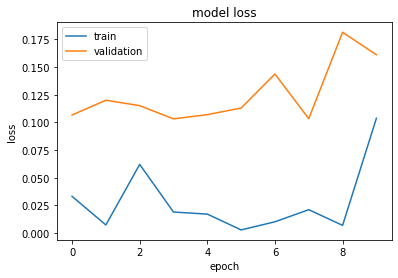

In [167]:
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

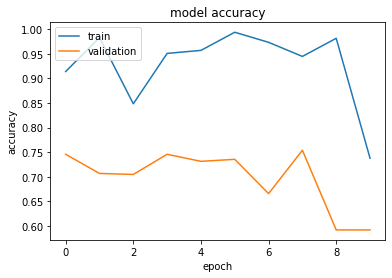

In [168]:
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [169]:
y_pred_8 = model_8.predict(TrainData, verbose = 1)
y_pred_bool_8 = np.argmax(y_pred_8, axis = 1)
y_pred_one_hot_8 = [str(to_categorical(i, 4)) for i in y_pred_bool_8]

46/46 [==============================] - 12s 252ms/step


In [170]:
print(classification_report(df['label'][0:len(y_pred_bool_8)], y_pred_one_hot_8))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.24      0.26      0.25       352
[0. 0. 1. 0.]       0.25      0.29      0.27       355
[0. 1. 0. 0.]       0.30      0.17      0.22       378
[1. 0. 0. 0.]       0.26      0.31      0.29       380

     accuracy                           0.26      1465
    macro avg       0.26      0.26      0.26      1465
 weighted avg       0.26      0.26      0.26      1465



In [171]:
validation_y_pred_8 = model.predict(ValidationData, verbose = 1)
validation_y_pred_bool_8 = np.argmax(validation_y_pred_8, axis = 1)
validation_y_pred_one_hot_8 = [str(to_categorical(i, 4)) for i in validation_y_pred_bool_8]

 3/16 [====>.........................] - ETA: 2s

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 4s 236ms/step


In [172]:
print(classification_report(df['label'][len(y_pred_bool):], validation_y_pred_one_hot_8))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.17      0.21      0.19       107
[0. 0. 1. 0.]       0.23      0.34      0.27       107
[0. 1. 0. 0.]       0.22      0.07      0.10       131
[1. 0. 0. 0.]       0.28      0.29      0.29       143

     accuracy                           0.23       488
    macro avg       0.22      0.23      0.21       488
 weighted avg       0.23      0.23      0.21       488



### Compare MSE with Categorical Cross Entropy:

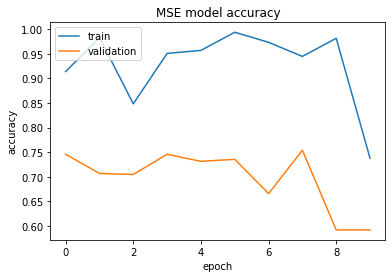

In [179]:
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('MSE model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

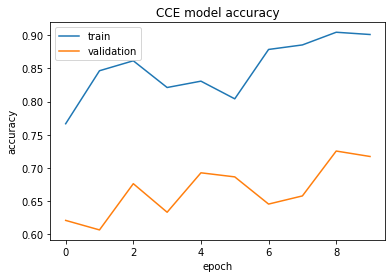

In [180]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('CCE model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### MSE:

In [175]:
print(classification_report(df['label'][0:len(y_pred_bool_8)], y_pred_one_hot_8))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.24      0.26      0.25       352
[0. 0. 1. 0.]       0.25      0.29      0.27       355
[0. 1. 0. 0.]       0.30      0.17      0.22       378
[1. 0. 0. 0.]       0.26      0.31      0.29       380

     accuracy                           0.26      1465
    macro avg       0.26      0.26      0.26      1465
 weighted avg       0.26      0.26      0.26      1465



### Categorical Cross Entropy:

In [176]:
print(classification_report(df['label'][0:len(y_pred_bool_4)], y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.22      0.27      0.24       352
[0. 0. 1. 0.]       0.25      0.26      0.26       355
[0. 1. 0. 0.]       0.26      0.25      0.25       378
[1. 0. 0. 0.]       0.27      0.22      0.24       380

     accuracy                           0.25      1465
    macro avg       0.25      0.25      0.25      1465
 weighted avg       0.25      0.25      0.25      1465



### MSE:

In [177]:
print(classification_report(df['label'][len(y_pred_bool_8):], validation_y_pred_one_hot_8))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.17      0.21      0.19       107
[0. 0. 1. 0.]       0.23      0.34      0.27       107
[0. 1. 0. 0.]       0.22      0.07      0.10       131
[1. 0. 0. 0.]       0.28      0.29      0.29       143

     accuracy                           0.23       488
    macro avg       0.22      0.23      0.21       488
 weighted avg       0.23      0.23      0.21       488



### Categorical Cross Entropy:

In [178]:
print(classification_report(df['label'][len(y_pred_bool_4):], validation_y_pred_one_hot_4))

               precision    recall  f1-score   support

[0. 0. 0. 1.]       0.20      0.22      0.21       107
[0. 0. 1. 0.]       0.20      0.21      0.21       107
[0. 1. 0. 0.]       0.20      0.22      0.21       131
[1. 0. 0. 0.]       0.31      0.23      0.26       143

     accuracy                           0.22       488
    macro avg       0.23      0.22      0.22       488
 weighted avg       0.23      0.22      0.23       488



### The result with categorical cross entropy is better than MSE.

### 2:  MSE is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. It is the loss function to be evaluated first and only changed if you have a good reason.